In [ ]:
# Uncomment and run this cell if you're on Colab or Kaggle
# !git clone https://github.com/nlp-with-transformers/notebooks.git
# %cd notebooks
# from install import *
# install_requirements()

In [ ]:
#hide
from utils import *
setup_chapter()

# Hello Transformers

<img alt="transformer-timeline" caption="The transformers timeline" src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_timeline.png?raw=1" id="transformer-timeline"/>

## The Encoder-Decoder Framework

<img alt="rnn" caption="Unrolling an RNN in time." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_rnn.png?raw=1" id="rnn"/>

<img alt="enc-dec" caption="Encoder-decoder architecture with a pair of RNNs. In general, there are many more recurrent layers than those shown." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_enc-dec.png?raw=1" id="enc-dec"/>

## Attention Mechanisms

<img alt="enc-dec-attn" caption="Encoder-decoder architecture with an attention mechanism for a pair of RNNs." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_enc-dec-attn.png?raw=1" id="enc-dec-attn"/>

<img alt="attention-alignment" width="500" caption="RNN encoder-decoder alignment of words in English and the generated translation in French (courtesy of Dzmitry Bahdanau)." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter02_attention-alignment.png?raw=1" id="attention-alignment"/>

<img alt="transformer-self-attn" caption="Encoder-decoder architecture of the original Transformer." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_self-attention.png?raw=1" id="transformer-self-attn"/>

## Transfer Learning in NLP

<img alt="transfer-learning" caption="Comparison of traditional supervised learning (left) and transfer learning (right)." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_transfer-learning.png?raw=1" id="transfer-learning"/>  

<img alt="ulmfit" width="500" caption="The ULMFiT process (courtesy of Jeremy Howard)." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_ulmfit.png?raw=1" id="ulmfit"/>

## Hugging Face Transformers: Bridging the Gap

## A Tour of Transformer Applications

In [1]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

### Text Classification

In [2]:
#hide_output
from transformers import pipeline
classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [5]:
import pandas as pd

outputs = classifier(text)
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.901546


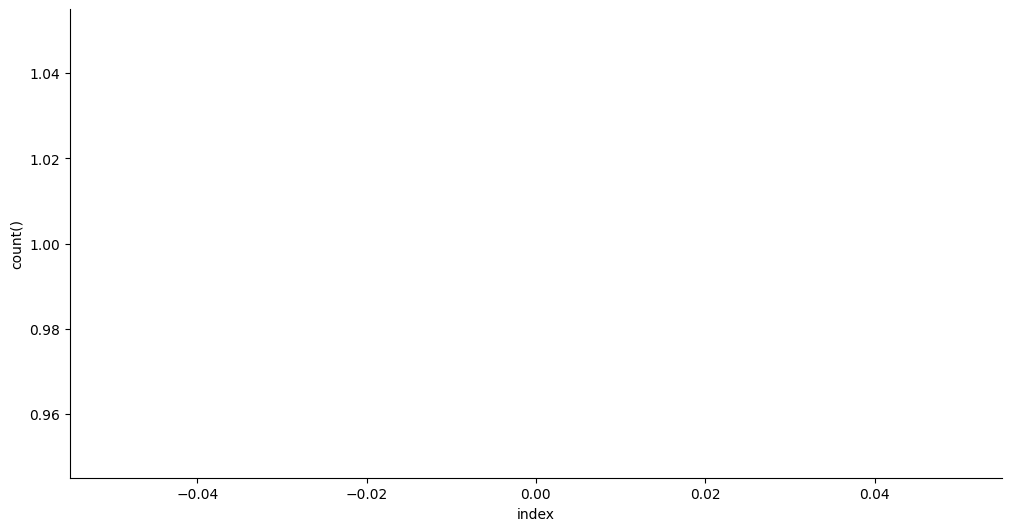

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

### Named Entity Recognition

In [10]:
ner_tagger = pipeline("ner", aggregation_strategy="simple")
outputs = ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556569,Mega,208,212
4,PER,0.590257,##tron,212,216
5,ORG,0.669693,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775361,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


### Question Answering

In [18]:
from transformers import pipeline
import pandas as pd

reader = pipeline("question-answering")

text = "We can see that along with the answer, the pipeline also returned start and end inte \
gers that correspond to the character indices where the answer span was found (just \
like with NER tagging). There are several flavors of question answering that we will \
investigate in Chapter 7, but this particular kind is called extractive question answer\
ing because the answer is extracted directly from the text.\
With this approach you can read and extract relevant information quickly from a cus\
tomer’s feedback. But what if you get a mountain of long-winded complaints and you\
don’t have the time to read them all? Let’s see if a summarization model can help"


question = "tell me about the text"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


,score,start,end,answer
0,0.04749,315,399,extractive question answering because the answ...


### Summarization

In [19]:
summarizer = pipeline("summarization")
outputs = summarizer(text, max_length=45, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0
Your min_length=56 must be inferior than your max_length=45.
/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1427: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (45). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


 We can see that along with the answer, the pipeline also returned start and end inte gers that correspond to the character indices where the answer span was found. There are several flavors of question answering that we


### Translation

In [20]:
translator = pipeline("translation_en_to_de", model="Helsinki-NLP/opus-mt-en-de")
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0]['translation_text'])

config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda:0


Wir können sehen, dass die Pipeline zusammen mit der Antwort auch Start- und Endintegers zurückgegeben hat, die den Zeichenindizes entsprechen, in denen die Antwortspanne gefunden wurde (genau wie bei NER Tagging). Es gibt mehrere Geschmacksrichtungen der Fragebeantwortung, die wir in Kapitel 7 untersuchen werden, aber diese besondere Art wird als extraktive Fragebeantwortung bezeichnet, weil die Antwort direkt aus dem Text extrahiert wird.Mit diesem Ansatz können Sie relevante Informationen schnell aus einem Kundenfeedback lesen und extrahieren. Aber was ist, wenn Sie einen Berg von langatmigen Beschwerden bekommen und Sie nicht die Zeit haben, sie alle zu lesen? Lassen Sie sehen, ob ein Summierungsmodell helfen kann.


### Text Generation

In [ ]:
#hide
from transformers import set_seed
set_seed(42) # Set the seed to get reproducible results

In [ ]:
generator = pipeline("text-generation")
response = "Dear Bumblebee, I am sorry to hear that your order was mixed up."
prompt = text + "\n\nCustomer service response:\n" + response
outputs = generator(prompt, max_length=200)
print(outputs[0]['generated_text'])

Dear Amazon, last week I ordered an Optimus Prime action figure from your online
store in Germany. Unfortunately, when I opened the package, I discovered to my
horror that I had been sent an action figure of Megatron instead! As a lifelong
enemy of the Decepticons, I hope you can understand my dilemma. To resolve the
issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered.
Enclosed are copies of my records concerning this purchase. I expect to hear
from you soon. Sincerely, Bumblebee.

Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up. The order was
completely mislabeled, which is very common in our online store, but I can
appreciate it because it was my understanding from this site and our customer
service of the previous day that your order was not made correct in our mind and
that we are in a process of resolving this matter. We can assure you that your
order


## The Hugging Face Ecosystem

<img alt="ecosystem" width="500" caption="An overview of the Hugging Face ecosystem of libraries and the Hub." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_hf-ecosystem.png?raw=1" id="ecosystem"/>

### The Hugging Face Hub

<img alt="hub-overview" width="1000" caption="The models page of the Hugging Face Hub, showing filters on the left and a list of models on the right." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_hub-overview.png?raw=1" id="hub-overview"/>

<img alt="hub-model-card" width="1000" caption="A example model card from the Hugging Face Hub. The inference widget is shown on the right, where you can interact with the model." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_hub-model-card.png?raw=1" id="hub-model-card"/>

italicized text### Hugging Face Tokenizers

### Hugging Face Datasets

### Hugging Face Accelerate

## Main Challenges with Transformers

## Conclusion